<a href="https://colab.research.google.com/github/ivychung/plant-ML/blob/loading-imagenames-and-images/Tomato1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing required libraries
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import *
from google.colab import drive
import zipfile
import os
import shutil

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Extract the dataset zip file
dataset_name = 'PlantVillage'
drive_dataset_address = '/content/drive/Shareddrives/Anoushka && Ivy/Senior Design 2021_2022_Ivy and Anoushka/dataset/'
working_dataset_address = '/tmp/' + dataset_name + '/'

zip_ref = zipfile.ZipFile(drive_dataset_address + dataset_name + '.zip', 'r')
zip_ref.extractall('/tmp/') # Extracts the files into the appropriate folder
zip_ref.close()

In [5]:
# Removes the __MACOSX file that comes with zipping a file on Mac
try:
  shutil.rmtree('/tmp/__MACOSX')
except:
  pass

In [6]:
# Function to extract all sub- file/directory names
def read_filenames(dir_path, file_bool = True):
  if file_bool: # list all files in the folder
    return [f for f in os.listdir(dir_path) \
            if os.path.isfile(os.path.join(dir_path, f))]
  if not file_bool: # list all subfolders in the folder
    return [f for f in os.listdir(dir_path) \
            if os.path.isdir(os.path.join(dir_path, f))]


In [7]:
# getting classes
classes = read_filenames(working_dataset_address,file_bool = False)
classes

['Tomato_Bacterial_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_healthy',
 'Tomato__Target_Spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [8]:
# global variables to keep track of how many classes we have
CLASS_SIZE = len(classes)

In [9]:
# Collect all image names
img_names = [read_filenames(working_dataset_address+classes[i]) for i in range(CLASS_SIZE)]

# Row length should be the number of classes
print("Row Length", len(img_names))

# collect each column length
row_lengths = []
for i in range(CLASS_SIZE):
  row_lengths.append(len(img_names[i]))

print("Column length", row_lengths)

Row Length 10
Column length [2127, 1676, 1591, 1404, 1000, 1909, 952, 1771, 373, 3209]


In [13]:
img_path= os.path.join(working_dataset_address, classes[0], img_names[0][0])
# img = tf.keras.preprocessing.image.load_img(img_path)
# images = tf.keras.preprocessing.image.img_to_array(img)
# images.shape

# load and show an image with Pillow
from PIL import Image

image = Image.open(img_path)

# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

JPEG
(256, 256)
RGB


uint8
(256, 256, 3)


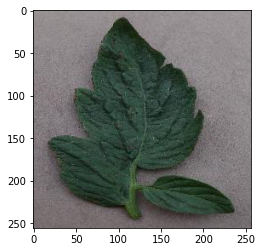

In [14]:
# images = []

# for i in range(CLASS_SIZE):
#   for j in range(len(img_names[i])):
#     img_path = os.path.join(working_dataset_address, classes[i], img_names[i][j])
#     try:
#       img = tf.keras.preprocessing.image.load_img(img_path)
#       images.append(img)
#     except:
#       pass
#       # print(i, j)

# image_count = len(images)
# print(image_count)
# type(images)

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot

# load image as pixel array
image = image.imread(working_dataset_address+'Tomato_Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')

# summarize type and shape of the pixel array
print(image.dtype)
print(image.shape)

# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [15]:
from numpy import asarray
# load the image
image = Image.open(img_path)
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image1 = Image.fromarray(data)
print(type(image1))

# summarize image details
print(image1.mode)
print(image1.size)

<class 'numpy.ndarray'>
(256, 256, 3)
<class 'PIL.Image.Image'>
RGB
(256, 256)


In [ ]:
# Read the images into a list
import cv2

images=np.empty([16012,256,256,3])

for i in range(CLASS_SIZE):
  for j in range(len(img_names[i])):
    img_path = os.path.join(working_dataset_address, classes[i], img_names[i][j])
    try:
      img = cv2.imread(img_path)
      images.append(img)
      # img = tf.keras.preprocessing.image.load_img(img_path)
      # images.append(tf.keras.preprocessing.image.img_to_array(img))
    except:
      pass
      # print(i, j)

image_count = len(images)
print(image_count)
type(images)

16012


numpy.ndarray

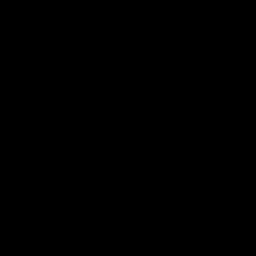

In [ ]:
# img = tf.keras.preprocessing.image.array_to_img(images[2])
# img

In [ ]:
from PIL import Image
np_images = np.array(images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


AttributeError: ignored

In [ ]:
# Now, we have a 2d list of uneven lengths. We have to clean this before making it an np array
max_length = max(row_lengths)
print(max_length)

for row in img_names:
    while len(row) < max_length:
        row.append(None)

images = np.array(img_names)
print(images.shape)

3209
(10, 3209)


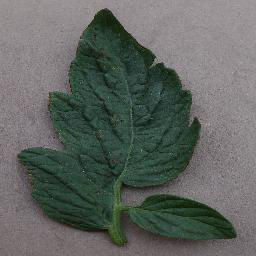

In [ ]:
img = tf.keras.preprocessing.image.load_img(working_dataset_address+'Tomato_Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')
img

In [ ]:
total = 0
for root, dirs, files in os.walk(working_dataset_address):
    total += len(files)
total

16013

In [ ]:
images = []

for i, class in enumerate(classes):
  images[0][i] = # image themselves
  images[1][i] = # labels